In [500]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [501]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [502]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [503]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_df = scaler.fit_transform(market_data_df)
scaled_df

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [504]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_df)
scaled_df


,0,1,2,3,4,5,6
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


In [505]:

# Copy the crypto names from the original data
scaled_df.index = market_data_df.index
scaled_df.columns = market_data_df.columns

# Set the coinid column as index

# Display sample data
scaled_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [506]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))



# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)

# Display the DataFrame
elbow_df


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: xlabel='k'>

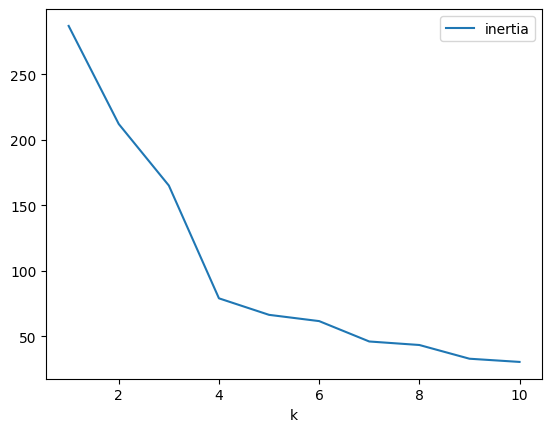

In [507]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia")

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [508]:
# Initialize the K-Means model using the best value for k
k_4 = KMeans(n_clusters=4, random_state=1)

In [509]:
# Fit the K-Means model using the scaled data
k_4.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [510]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clust = k_4.predict(scaled_df)

# View the resulting array of cluster values.
crypto_clust


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [511]:
# Create a copy of the DataFrame
kmeans_df = scaled_df.copy()

In [512]:
# Add a new column to the DataFrame with the predicted clusters
kmeans_df["clusters"] = crypto_clust

# Display sample data
kmeans_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

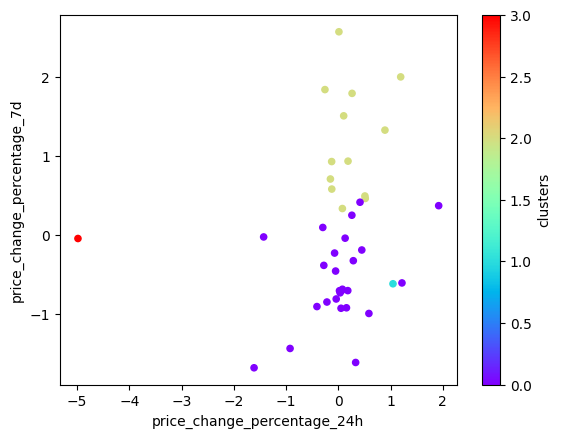

In [513]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
kmeans_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters",
    colormap="rainbow"
)



### Optimize Clusters with Principal Component Analysis.

In [514]:
# Create a PCA model instance and set `n_components=3`.
model = PCA(n_components=3)

In [515]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_df = model.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(pca_df)
pca_df

,0,1,2
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715
5,-0.516534,1.388377,0.804071
6,-0.450711,0.517699,2.846143
7,-0.345600,0.729439,1.478013
8,-0.649468,0.432165,0.600303
9,-0.759014,-0.201200,-0.217653


In [516]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** PCA1 = 37%
            PCA2 = 35%
            PCA3 = 18%

In [517]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
pca_df.index = scaled_df.index

# Set the coinid column as index
pca_df.reset_index("coin_id")

# Display sample data
pca_df.head()

,0,1,2
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [518]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)

# Display the DataFrame
elbow_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: xlabel='k'>

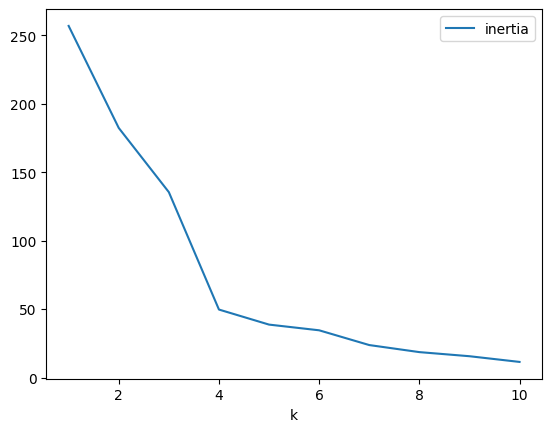

In [519]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It doesn't

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [520]:
# Initialize the K-Means model using the best value for k
pca_4 = KMeans(n_clusters=4, random_state=1)

In [521]:
# Fit the K-Means model using the PCA data
pca_4.fit(pca_df)

KMeans(n_clusters=4, random_state=1)

In [522]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clust = pca_4.predict(pca_df)

# Print the resulting array of cluster values.
pca_clust

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [523]:
# Create a copy of the DataFrame with the PCA data
pca_df_original = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df["clusters"] = pca_clust
pca_df.columns = ["PCA1", "PCA2", "PCA3", "Clusters"]

# Display sample data
pca_df

,PCA1,PCA2,PCA3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

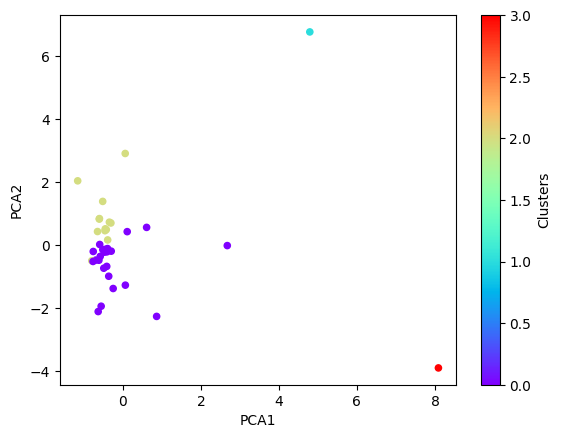

In [524]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
pca_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="Clusters",
    colormap="rainbow")


### Determine the Weights of Each Feature on each Principal Component

In [525]:
# Use the columns from the original scaled DataFrame as the index.
component_df = model.components_
component_df = pd.DataFrame(component_df)
pca_df.drop(columns=["Clusters"], inplace=True)
component_df.index = pca_df.columns
component_df.columns = scaled_df.columns
component_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PCA1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PCA2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PCA3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

PCA1 is influenced by price changes over the 200 day to 1 year time frame.
PCA2 is influenced by price changes over the 14 to 30 day period.
PCA3 is influenced by price changes over the 7 day period.